# <font color='blue'> LEAD  SCORING CASE STUDY </font>

## <font color='red'> Done By: </font>

###    <font color='green'> Saranraj K R </font>
###    <font color='green'> Rajan Verma </font>
###    <font color='green'> Devasani Ganesh </font>
###    <font color='green'> M Bharat </font>

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value

### Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

## Step 1: Reading and Understanding the data

#### Import all the neccessary libraies

In [1]:
#Import important libraries
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

#Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('display.max_colwidth', 1500)
pd.set_option("display.max_rows", 500)
pd.set_option('display.max_columns', None)

#Libraries for data modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Libraries for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [2]:
#Load and view the dataset
leads= pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
#Check nummber of rows and colummns in the dataset
print("Number of rows:",leads.shape[0])
print("Number of columns:",leads.shape[1])

Number of rows: 9240
Number of columns: 37


In [4]:
#View datatype and number of non-null values in all columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#View numerical data
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#Copy of original dataset
leads_copy=leads.copy()

In [7]:
#Check percentage of leads in the dataset
round(leads.Converted.sum()/len(leads.index),4)*100

38.54

As seen, there are 38.54% of customer data showing as leads

## Step 2: Data Cleaning

In [8]:
#Check number missing values in the dataset
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
#Check the percentage of null values in the dataset
round((leads.isnull().sum().sort_values(ascending=False)/len(leads.index))*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

**Insight:**
-  As we observe from the table, there is many columns is missing values.
-  Maximum missing values is 51%

We can drop the columns which has more than 30% of null values, as it is not useful for our analysis.

In [10]:
#Drop columns having null values percentage more tha 30%
cols=['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags']
leads.drop(cols,axis=1,inplace=True)

In [11]:
#Check number of unique rows in every column
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

**Insight:**
-  It is observed that columns `Prospect ID` and `Lead Number` are having unique values in every rows.
-  As it is not useful for our analysis. We can drop those columns

In [12]:
#Drop columns which has all values unique
leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

It is observed that there are few categorical columns which has value ***Select*** which meansthere is no option selected by the customer. As this is equivalent to null value we will impute NAN.

In [13]:
#Replace value NAN instead of Select
leads=leads.replace("Select",np.nan)

In [14]:
#Check the percentage of null values in the dataset
round((leads.isnull().sum().sort_values(ascending=False)/len(leads.index))*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

We can drop High percentage missing values columns as it will not impactr our analysis.

In [15]:
#Drop columns having null values percentage more tha 70%
cols=['How did you hear about X Education','Lead Profile']
leads.drop(cols,axis=1,inplace=True)

In [16]:
#Get list of only categorical columns
categorical_cols=leads.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [17]:
#Get list of only numerical columns
numerical_cols=leads.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [18]:
#Check frequency distribution of all categorical columns
for i in categorical_cols:
    null_values=leads[i].isnull().sum()
    if null_values>0:
        print(leads[i].value_counts())
        print()
        print("Number of null values:",leads[i].isnull().sum())
        print("percentage of ",100*leads[i].value_counts(normalize=True))
        print()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Number of null values: 36
percentage of  Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release        

**Insight:**<br>
-  List of columns-***['City','What matters most to you in choosing a course','What is your current occupation','Country','Lead Source','Last Activity']***
This list of columns can be imputed with mode value. 
-  For column `Specialization` impute null values as others.

In [19]:
#Impute mode value for categorical values
cols=['City','What matters most to you in choosing a course','What is your current occupation','Country','Lead Source'
      ,'Last Activity']
for i in cols:
    leads.loc[pd.isnull(leads[i]),[i]]=leads[i].mode()[0]

In [20]:
#Impute Others for null values in Specialization column
leads.loc[pd.isnull(leads['Specialization']),['Specialization']]="Others"

In [21]:
#Check numerical dta across all numerical columns
for i in numerical_cols:
    null_values=leads[i].isnull().sum()
    if null_values>0:
        print(i)
        print("Number of null values:",leads[i].isnull().sum())
        print(leads[i].describe())
        print()

TotalVisits
Number of null values: 137
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Page Views Per Visit
Number of null values: 137
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64



**Insight:**<br>
-  The mean and median value is almost similiar values. We can impute  nulll values with Meium values for safer side.

In [22]:
#Impute null values in numerical columns with Median value
cols=['TotalVisits','Page Views Per Visit']
for i in cols:
    leads.loc[pd.isnull(leads[i]),[i]]=leads[i].median()

In [23]:
#Check the percentage of null values in the dataset
round((leads.isnull().sum().sort_values(ascending=False)/len(leads.index))*100,2)

Lead Origin                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Source                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                       

Now we can see clean dataset with no null values.

In [24]:
#View Dataset
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [25]:
#Check number of unique rows in every column
leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

**Insight:**<br>
-  We observe there are many columns having just 1 value in the entire dataset.
-  We can check the percentage of value occurening on the dataset.
-  Drop the columns having value frequency more than 90% as it is not useful for our analysis.

In [26]:
#Check values in the columns which has more than 90% occurence
cols=leads.columns
#Create list of columns which we can drop
drop_cols=[]
for i in cols:
    distribution=leads[i].value_counts(normalize=True)[0]
    if distribution>0.90:
        print(i)
        print("Value: {0} - percentage --> {1}".format(leads[i].mode()[0],round(distribution,2)))
        print()
        drop_cols.append(i)

Do Not Email
Value: No - percentage --> 0.92

Do Not Call
Value: No - percentage --> 1.0

Country
Value: India - percentage --> 0.97

What matters most to you in choosing a course
Value: Better Career Prospects - percentage --> 1.0

Search
Value: No - percentage --> 1.0

Magazine
Value: No - percentage --> 1.0

Newspaper Article
Value: No - percentage --> 1.0

X Education Forums
Value: No - percentage --> 1.0

Newspaper
Value: No - percentage --> 1.0

Digital Advertisement
Value: No - percentage --> 1.0

Through Recommendations
Value: No - percentage --> 1.0

Receive More Updates About Our Courses
Value: No - percentage --> 1.0

Update me on Supply Chain Content
Value: No - percentage --> 1.0

Get updates on DM Content
Value: No - percentage --> 1.0

I agree to pay the amount through cheque
Value: No - percentage --> 1.0



In [27]:
#Drop columns having value frqucency more than 90%
leads.drop(drop_cols,axis=1,inplace=True)

In [28]:
#View Dataset
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [29]:
#Replace Yes/No to 1/0 for column A "free copy of Mastering The Interview"
leads['A free copy of Mastering The Interview']=leads['A free copy of Mastering The Interview'].apply(lambda x:1 if x=="Yes" else 0)

In [30]:
#View Dataset
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

## Step 3: Outlier Analyis

In [31]:
#Checking the data at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.357440                                0.312554  
std                2.145781                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               55.000000                                1.000000

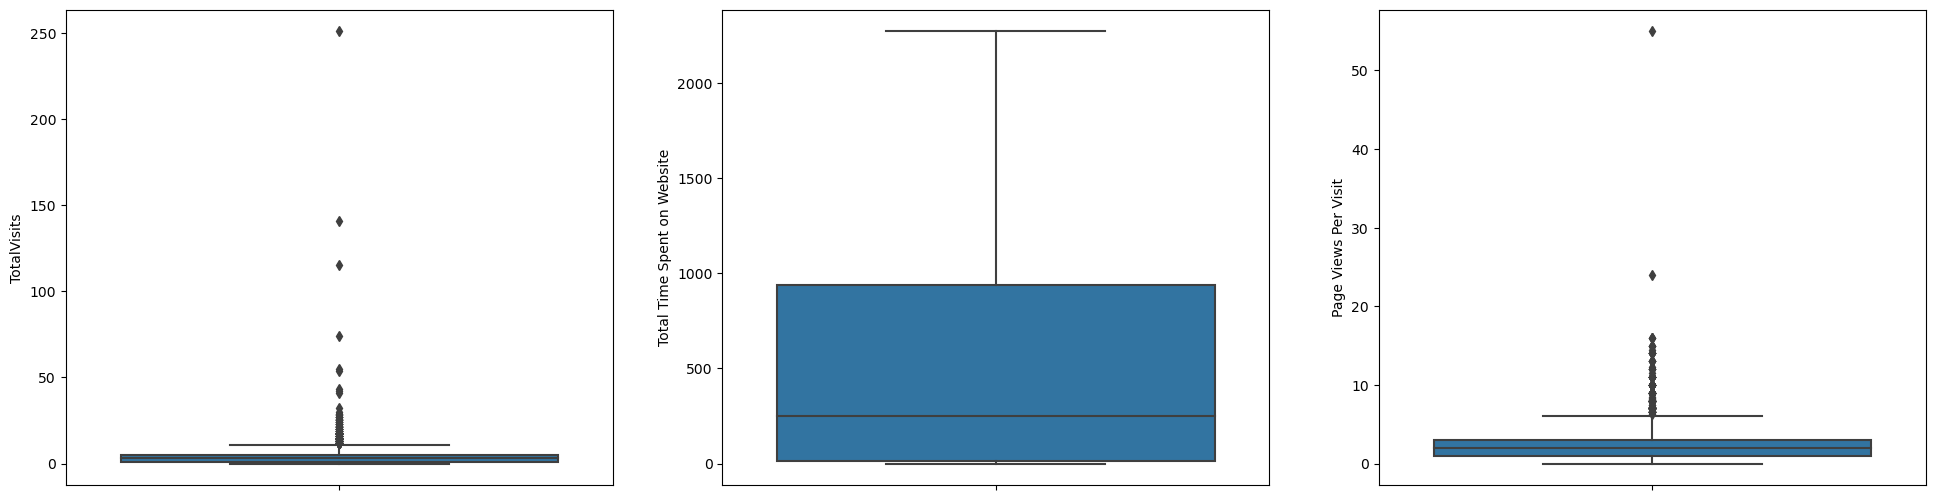

In [32]:
# Checking the outliers 
plt.figure(figsize=(24, 21))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.show()

In [33]:
#Removing values beyond 99% for Total Visits
total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < total_visits]
leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [34]:
#Removing values beyond 99% for page Views Per Visit
page_visits = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < page_visits]
leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [35]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9029.000000  9029.000000                  9029.000000   
mean      0.385092     3.087164                   483.133016   
std       0.486644     2.801244                   547.420675   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     7.000000   
50%       0.000000     3.000000                   245.000000   
75%       1.000000     4.000000                   929.000000   
90%       1.000000     7.000000                  1378.000000   
95%       1.000000     8.000000                  1558.000000   
99%       1.000000    13.000000                  1839.720000   
max       1.000000    16.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9029.000000                             9029.000000  
mean               2.226383                                0.305682  
std                1.823395                                0.460721  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                7.000000                                1.000000  
max                8.000000                                1.000000

In [36]:
#Finding the percentage of data retained
percent_data = round(100*(len(leads)/9240),2)
print(percent_data)

97.72


## Step 4: Univariate Analysis

In [37]:
#Required columns for analysis
cat_col1=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']

(0, 'Lead Origin')
(1, 'Lead Source')
(2, 'Last Activity')
(3, 'What is your current occupation')


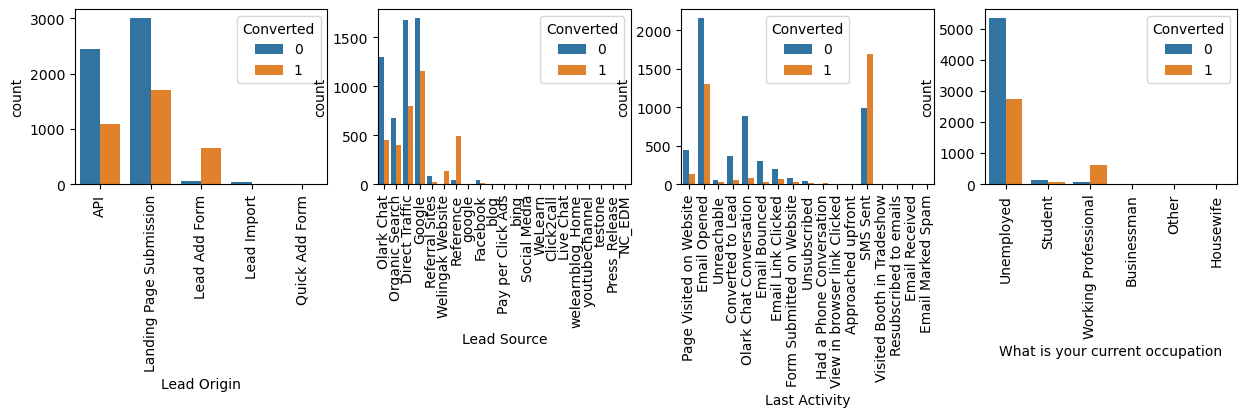

In [38]:
#Plot count plot on selected columns
plt.figure(figsize = (15, 5))
for i in enumerate(cat_col1):
    plt.subplot(2,4,i[0]+1)
    print(i)
    sns.countplot(x=i[1], hue = 'Converted', data = leads)
    plt.xticks(rotation = 90)

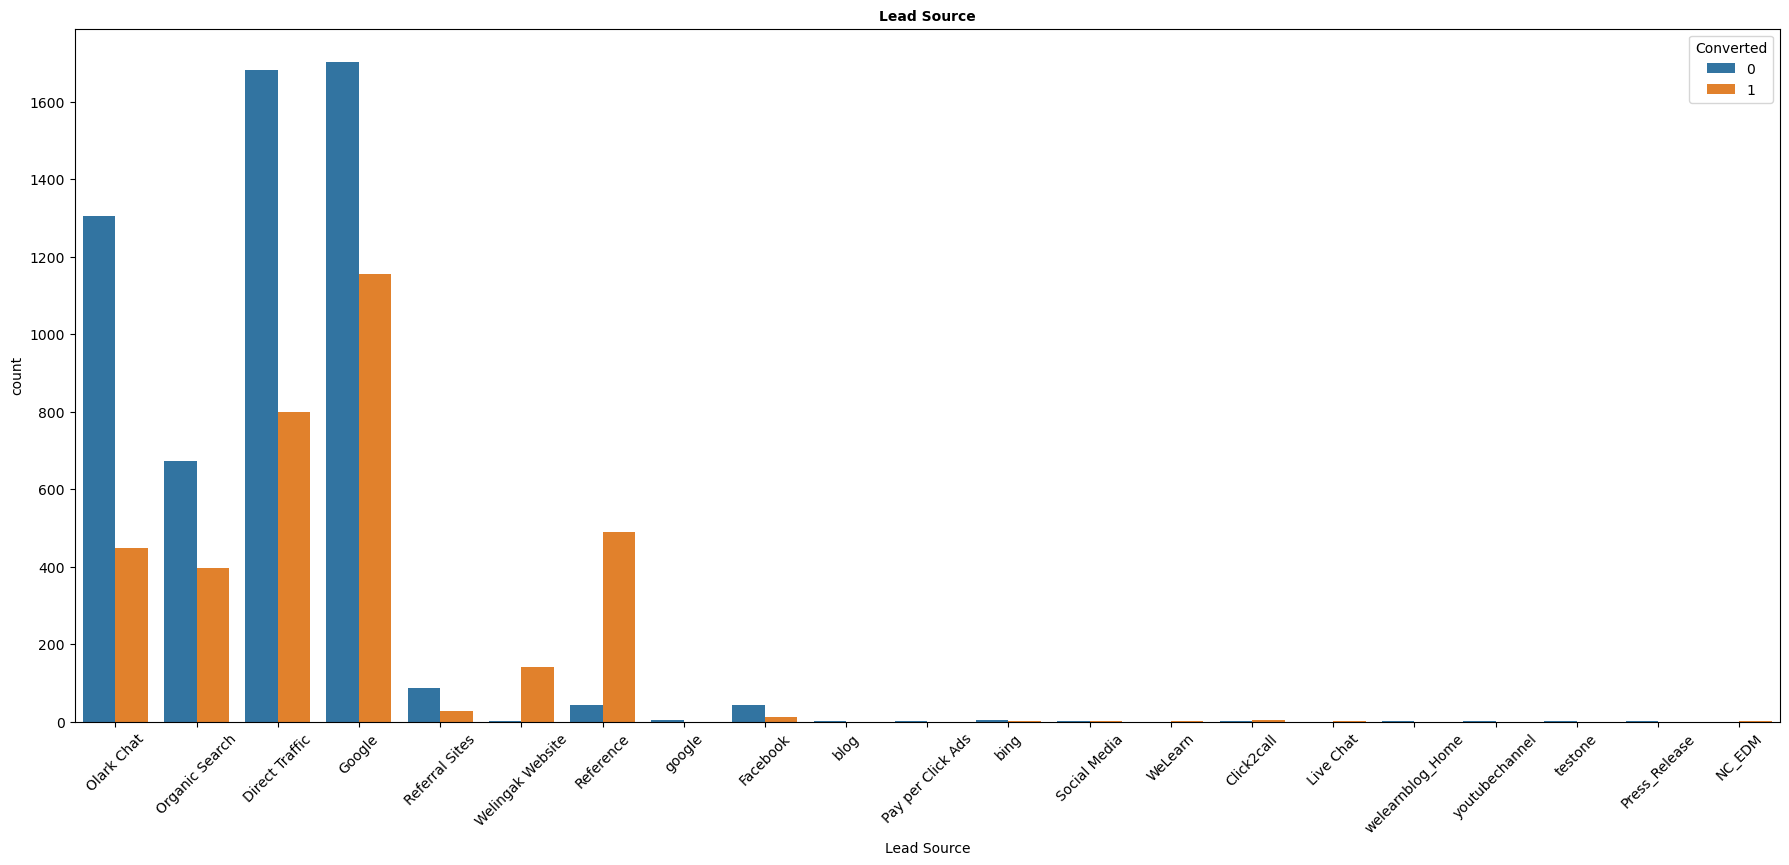

In [39]:
#Checking count plot on Lead Source column
plt.figure(figsize = (22,9))
plt.subplots_adjust(hspace=0.2)
sns.countplot(data = leads, x = 'Lead Source', hue = leads.Converted, palette = "tab10")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

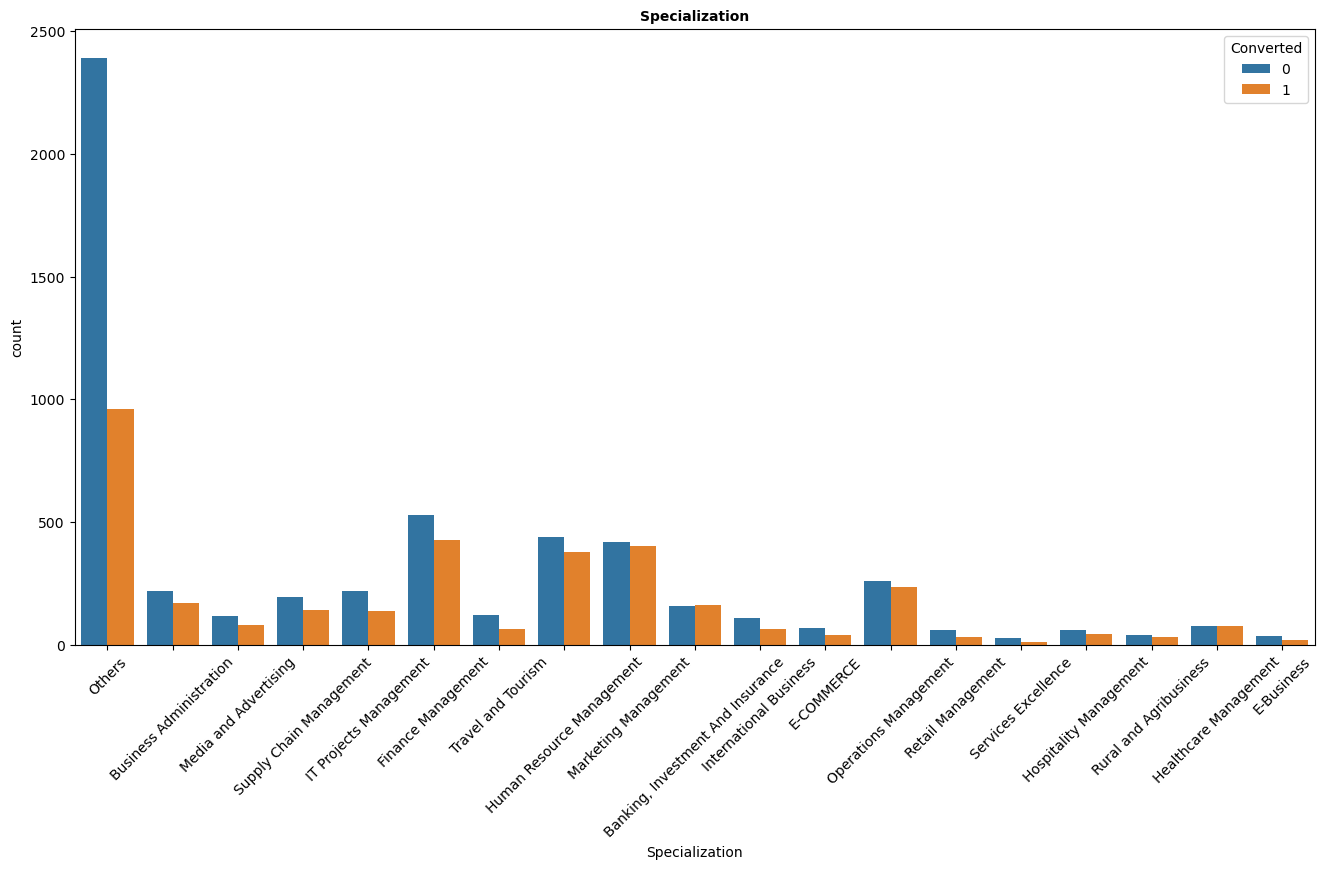

In [40]:
#Checking count plot on Specialization column
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace=0.2)
sns.countplot(data = leads, x = 'Specialization', hue = leads.Converted, palette = "tab10")
plt.title('Specialization', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

## Step 5: Bivariate Analyis

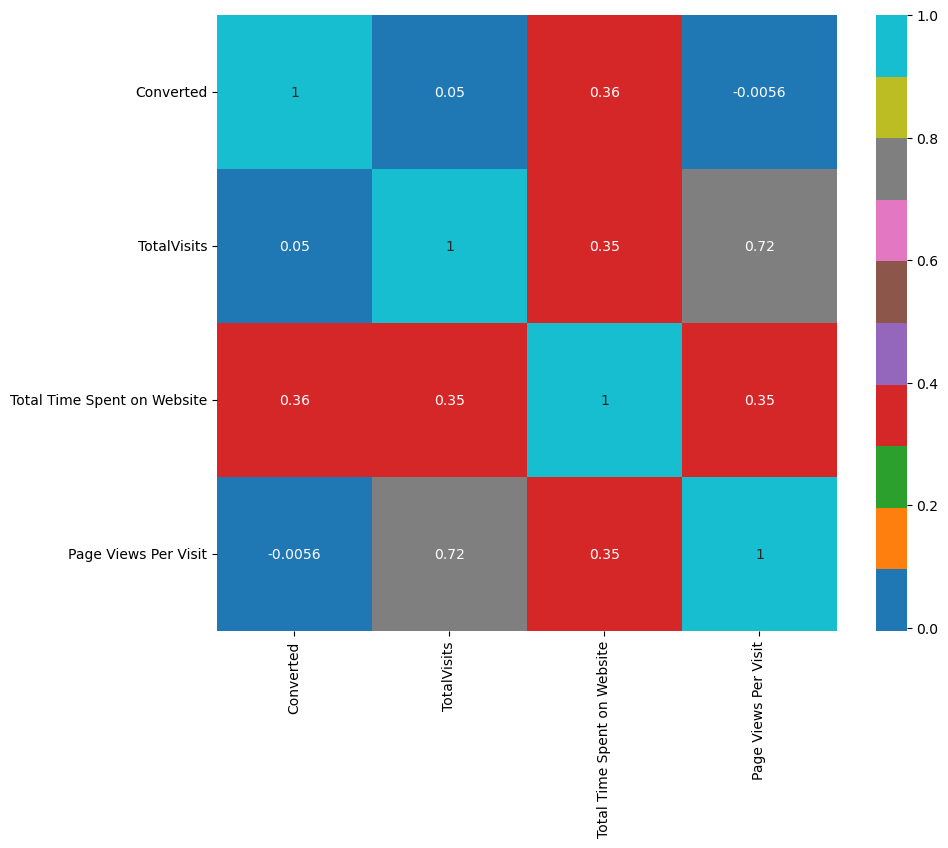

In [41]:
#Checking the correlations of numerical values
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(leads[numerical_cols].corr(), cmap="tab10", annot=True)
plt.show()

## Step 6: Data imbalance Analysis

In [42]:
#Seperate leads and not leads data
Converted_0=leads[leads["Converted"]==0]
Converted_1=leads[leads["Converted"]==1]
print("Shape of not Converted Leads in the dataset :", Converted_0.shape)
print("Shape of Converted Lead in the dataset :", Converted_1.shape)

Shape of not Converted Leads in the dataset : (5552, 12)
Shape of Converted Lead in the dataset : (3477, 12)


In [43]:
#Calculating Data Imbalance
imbalance_ratio= round((Converted_0.shape[0])/(Converted_1.shape[0]),2)
print("Imbalance Ratio :",imbalance_ratio)

Imbalance Ratio : 1.6


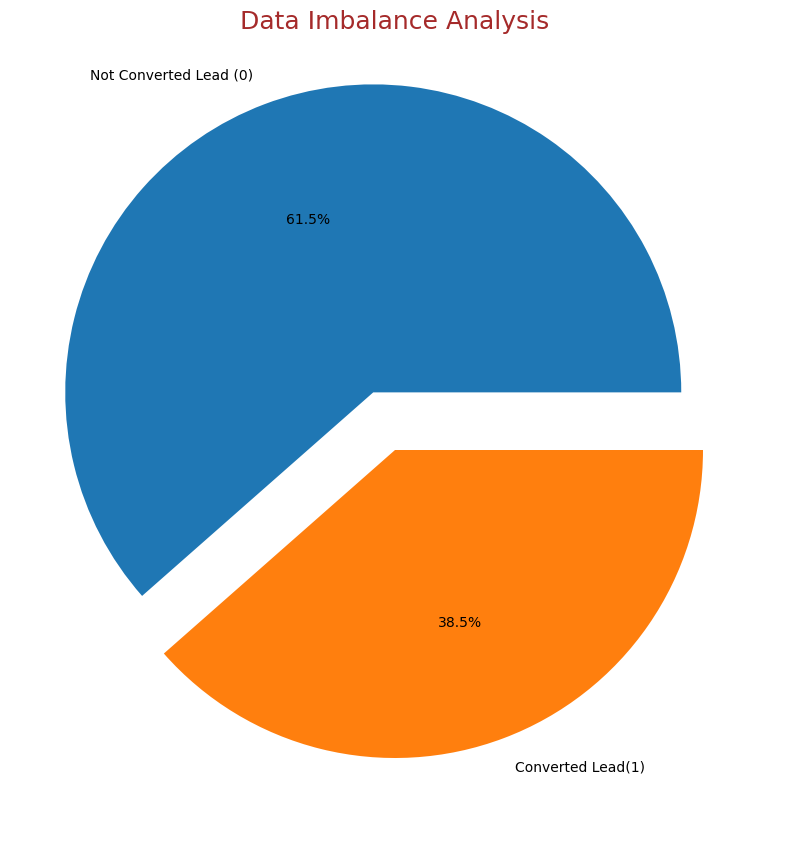

In [44]:
#Check imbalance in pie chart
plt.figure(figsize=[10,10])
myexplode=[0.2,0]
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], explode=myexplode, autopct='%1.1f%%')
plt.title("Data Imbalance Analysis\n", fontdict={'fontsize':18,'fontweight':8,'color':'brown'})
plt.show()

## Step 7: Data Preparation for modelling

In [45]:
#View Dataset
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation    City  \
0                   Others                      Unemployed  Mumbai   
1                   Others                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                   Others                      Unemployed  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

Create dummy variables for categorical columns

In [46]:
#Get list of only categorical columns
categorical_cols=leads.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'Last Notable Activity']

In [47]:
#Create dummmy variable for categorical columns and drop first value
leads=pd.get_dummies(data=leads,columns=categorical_cols,dtype=int,drop_first=True)

In [48]:
#Find correlation of all varaiables
leads.corr()

Converted  TotalVisits  \
Converted                                              1.000000     0.050210   
TotalVisits                                            0.050210     1.000000   
Total Time Spent on Website                            0.359630     0.353603   
Page Views Per Visit                                  -0.005636     0.723836   
A free copy of Mastering The Interview                -0.040934     0.276740   
Lead Origin_Landing Page Submission                   -0.051533     0.434574   
Lead Origin_Lead Add Form                              0.325676    -0.253650   
Lead Origin_Lead Import                               -0.023927    -0.045630   
Lead Origin_Quick Add Form                             0.013299    -0.000328   
Lead Source_Direct Traffic                            -0.079562     0.131445   
Lead Source_Facebook                                  -0.023927    -0.043597   
Lead Source_Google                                     0.026921     0.221070   
Lead Source_Live Chat                                  0.018809    -0.016405   
Lead Source_NC_EDM                                     0.013299     0.014702   
Lead Source_Olark Chat                                -0.130845    -0.485689   
Lead Source_Organic Search                            -0.010330     0.278404   
Lead Source_Pay per Click Ads                         -0.008329    -0.000328   
Lead Source_Press_Release                             -0.008329     0.010944   
Lead Source_Reference                                  0.274013    -0.213139   
Lead Source_Referral Sites                            -0.033813     0.075456   
Lead Source_Social Media                               0.003515    -0.003120   
Lead Source_WeLearn                                    0.013299    -0.004085   
Lead Source_Welingak Website                           0.156072    -0.118023   
Lead Source_bing                                      -0.011575    -0.008474   
Lead Source_blog                                      -0.008329     0.003430   
Lead Source_google                                    -0.018628     0.021117   
Lead Source_testone                                   -0.008329     0.007187   
Lead Source_welearnblog_Home                          -0.008329    -0.004085   
Lead Source_youtubechannel                            -0.008329     0.003430   
Last Activity_Converted to Lead                       -0.118414    -0.095601   
Last Activity_Email Bounced                           -0.120568    -0.063049   
Last Activity_Email Link Clicked                      -0.040075    -0.025819   
Last Activity_Email Marked Spam                        0.018809     0.004851   
Last Activity_Email Opened                            -0.016035     0.069218   
Last Activity_Email Received                           0.018809     0.012822   
Last Activity_Form Submitted on Website               -0.033813     0.022105   
Last Activity_Had a Phone Conversation                 0.039550     0.024788   
Last Activity_Olark Chat Conversation                 -0.213901    -0.212031   
Last Activity_Page Visited on Website                 -0.081624     0.212512   
Last Activity_Resubscribed to emails                   0.013299    -0.011599   
Last Activity_SMS Sent                                 0.329907     0.018585   
Last Activity_Unreachable                             -0.007541     0.024511   
Last Activity_Unsubscribed                            -0.022706     0.011568   
Last Activity_View in browser link Clicked            -0.016660     0.003103   
Last Activity_Visited Booth in Tradeshow              -0.008329     0.003430   
Specialization_Business Administration                 0.022386     0.071367   
Specialization_E-Business                             -0.002347     0.025791   
Specialization_E-COMMERCE                             -0.006741     0.038246   
Specialization_Finance Management                      0.042794     0.094667   
Specialization_Healthcare Management                  

Split the dataset into Train and Test

In [49]:
#Split dataset into X & y
y=leads.pop('Converted')
X=leads

In [50]:
#Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [51]:
#Print shape of train and test dataste
print("Shape of Train data :",X_train.shape)
print("Shape of Test data :",X_test.shape)

Shape of Train data : (6320, 87)
Shape of Test data : (2709, 87)


Perform scaling in the dataset to have all values within certain value, which is between 0 to 1.

In [52]:
#Perform Min Max Scaling
initial_cols=X_train.columns
scaler=MinMaxScaler()
X_train[initial_cols]=scaler.fit_transform(X_train[initial_cols])

In [53]:
#Create new varaiable columns to store coluimn names
cols=initial_cols

In [54]:
#Veiw Training data after scaling
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5493       0.1250                     0.042254                 0.250   
8064       0.1875                     0.041373                 0.375   
4716       0.1875                     0.099032                 0.375   
9117       0.0000                     0.000000                 0.000   
2402       0.3750                     0.381162                 0.250   

      A free copy of Mastering The Interview  \
5493                                     1.0   
8064                                     0.0   
4716                                     1.0   
9117                                     0.0   
2402                                     0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5493                                  1.0                        0.0   
8064                                  0.0                        0.0   
4716                                  1.0                        0.0   
9117                                  0.0                        0.0   
2402                                  1.0                        0.0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5493                      0.0                         0.0   
8064                      0.0                         0.0   
4716                      0.0                         0.0   
9117                      0.0                         0.0   
2402                      0.0                         0.0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
5493                         1.0                   0.0                 0.0   
8064                         1.0                   0.0                 0.0   
4716                         0.0                   0.0                 0.0   
9117                         0.0                   0.0                 0.0   
2402                         0.0                   0.0                 1.0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
5493                    0.0                 0.0                     0.0   
8064                    0.0                 0.0                     0.0   
4716                    0.0                 0.0                     0.0   
9117                    0.0                 0.0                     1.0   
2402                    0.0                 0.0                     0.0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
5493                         0.0                            0.0   
8064                         0.0                            0.0   
4716                         1.0                            0.0   
9117                         0.0                            0.0   
2402                         0.0                            0.0   

      Lead Source_Press_Release  Lead Source_Reference  \
5493                        0.0                    0.0   
8064                        0.0                    0.0   
4716                        0.0                    0.0   
9117                        0.0                    0.0   
2402                        0.0                    0.0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
5493                         0.0                       0.0   
8064                         0.0                       0.0   
4716                         0.0                       0.0   
9117                         0.0                       0.0   
2402                         0.0                       0.0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
5493                  0.0                           0.0               0.0   
8064                  0.0                           0.0               0.0   
4716                  0.0                           0.0               0.0   
9117                  0.0                           0.0               0.0   
2402                  0.0                           0.

In [55]:
#Check correlation in the heatmap
plt.figure(figsize=(150,60))
sns.heatmap(X_train.corr(),annot=True,cmap='coolwarm')
plt.show()

## Step 8: Model Building

Check the stats without removing any columns

In [56]:
# Logistic regression model with StatsModels
X_train_sm=sm.add_constant(X_train)
lgm1=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Mar 2024   Deviance:                   1.3456e+05
Time:                        15:01:16   Pearson chi2:                 6.58e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.055e+15   5.26e+07   1.15e+08      0.000    6.06e+15    6.06e+15
TotalVisits                                           5.737e+14   7.55e+06   7.59e+07      0.000    5.74e+14    5.74e+14
Total Time Spent on Website                           4.242e+14   4.05e+06   1.05e+08      0.000    4.24e+14    4.24e+14
Page Views Per Visit                                  1.737e+14   6.35e+06   2.74e+07      0.000    1.74e+14    1.74e+14
A free copy of Mastering The Interview                6.421e+10   2.74e+06   2.34e+04      0.000    6.42e+10    6.42e+10
Lead Origin_Landing Page Submission                  -3.901e+14   3.44e+06  -1.13e+08      0.000    -3.9e+14    -3.9e+14
Lead Origin_Lead Add Form                             5.164e+14   1.32e+07    3.9e+07      0.000    5.16e+14    5.16e+14
Lead Origin_Lead Import                               8.574e+14    4.8e+07   1.79e+07      0.000    8.57e+14    8.57e+14
Lead Origin_Quick Add Form                              49.0705   8.07e-07   6.08e+07      0.000      49.071      49.071
Lead Source_Direct Traffic                           -1.487e+15   4.12e+07  -3.61e+07      0.000   -1.49e+15   -1.49e+15
Lead Source_Facebook                                 -1.961e+15   6.32e+07   -3.1e+07      0.000   -1.96e+15   -1.96e+15
Lead Source_Google                                   -1.369e+15    4.1e+07  -3.34e+07      0.000   -1.37e+15   -1.37e+15
Lead Source_Live Chat                                  2.44e+15   6.14e+07   3.97e+07      0.000    2.44e+15    2.44e+15
Lead Source_NC_EDM                                    3.366e+15   7.87e+07   4.28e+07      0.000    3.37e+15    3.37e+15
Lead Source_Olark Chat                               -1.674e+15   4.12e+07  -4.06e+07      0.000   -1.67e+15   -1.67e+15
Lead Source_Organic Search                           -1.478e+15   4.12e+07  -3.59e+07      0.000   -1.48e+15   -1.48e+15
Lead Source_Pay per Click Ads                            5.3349   7.14e-07   7.47e+06      0.000       5.335       5.335
Lead Source_Press_Release                            -5.026e+15    7.9e+07  -6.36e+07      0.000   -5.03e+15   -5.03e+15
Lead Source_Reference                                -8.164e+14    3.9e+07  -2.09e+07      0.000   -8.16e+14   -8.16e+14
Lead Source_Referral Sites                           -1.405e+15   4.18e+07  -3.36e+07      0.000    -1.4e+15    -1.4e+15
Lead Source_Social Media                             -1.032e+15   6.29e+07  -1.64e+07      0.000   -1.03e+15   -1.03e+15
Lead Source_WeLearn                                   3.691e+15   7.88e+07   4.69e+07      0.000    3.69e+15    3.69e+15
Lead Source_Welingak Website                         -6.33

In [57]:
#Create functions
def Build_Model(required_cols):
    X_train_sm=sm.add_constant(X_train[required_cols])
    lgm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
    res=lgm.fit()
    print(res.summary())
    return res

def Calculate_VIF(required_cols):
    df=X_train[required_cols]
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
                
def plot_heatmap(required_cols):
    plt.figure(figsize=(15,15))
    sns.heatmap(X_train[required_cols].corr(),annot=True,cmap="coolwarm")
    plt.show()

Use RFE to reduce the number of variables for our analysis, which helps us work on most useful data.

In [58]:
#Use RFE and select 15 variables
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
rfe = RFE(logreg, n_features_to_select=15,step=1)            
rfe = rfe.fit(X_train, y_train)

In [59]:
#Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 68),
 ('Lead Origin_Quick Add Form', False, 70),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 71),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 48),
 ('Lead Source_blog', False, 27),
 ('Lead Source_google

In [60]:
#List of RFE supported columns
cols=X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [61]:
#Building model 1
Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.9
Date:                Tue, 19 Mar 2024   Deviance:                       5211.8
Time:                        15:01:27   Pearson chi2:                 7.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [62]:
#Check VIF
Calculate_VIF(cols)

                                                Features   VIF
2                    Lead Origin_Landing Page Submission  2.98
0                                            TotalVisits  2.97
9                                  Specialization_Others  2.51
1                            Total Time Spent on Website  2.11
4                                 Lead Source_Olark Chat  2.08
8                  Last Activity_Olark Chat Conversation  1.49
3                              Lead Origin_Lead Add Form  1.47
13                        Last Notable Activity_SMS Sent  1.43
5                           Lead Source_Welingak Website  1.32
11  What is your current occupation_Working Professional  1.21
6                        Last Activity_Converted to Lead  1.12
7                            Last Activity_Email Bounced  1.08
14                     Last Notable Activity_Unreachable  1.01
10             What is your current occupation_Housewife  1.00
12        Last Notable Activity_Had a Phone Conversatio

**Insight:**<br>
-  There are many columns with more p-values.
-  VIF values seems to be fine.
-  Column `What is your current occupation_Housewife` has high p-value, which we can drop.

### Model 2

In [63]:
#Convert cols varaiable to list
cols=list(cols)

In [64]:
# Drop column "What is your current occupation_Housewife"
cols.remove("What is your current occupation_Housewife")

In [65]:
#Building model 2
Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.8
Date:                Tue, 19 Mar 2024   Deviance:                       5223.5
Time:                        15:01:27   Pearson chi2:                 7.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [66]:
#Check VIF
Calculate_VIF(cols)

                                                Features   VIF
2                    Lead Origin_Landing Page Submission  2.98
0                                            TotalVisits  2.97
9                                  Specialization_Others  2.51
1                            Total Time Spent on Website  2.10
4                                 Lead Source_Olark Chat  2.08
8                  Last Activity_Olark Chat Conversation  1.49
3                              Lead Origin_Lead Add Form  1.47
12                        Last Notable Activity_SMS Sent  1.43
5                           Lead Source_Welingak Website  1.32
10  What is your current occupation_Working Professional  1.21
6                        Last Activity_Converted to Lead  1.12
7                            Last Activity_Email Bounced  1.08
13                     Last Notable Activity_Unreachable  1.01
11        Last Notable Activity_Had a Phone Conversation  1.00


**Insight:**<br>
-  Column `Last Notable Activity_Had a Phone Conversation` has high p-value, which we can drop.

### Model 3

In [67]:
# Drop column "What is your current occupation_Housewife"
cols.remove("Last Notable Activity_Had a Phone Conversation")

In [68]:
#Building model 3
Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.8
Date:                Tue, 19 Mar 2024   Deviance:                       5239.6
Time:                        15:01:28   Pearson chi2:                 7.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [69]:
#Check VIF
Calculate_VIF(cols)

                                                Features   VIF
2                    Lead Origin_Landing Page Submission  2.98
0                                            TotalVisits  2.96
9                                  Specialization_Others  2.51
1                            Total Time Spent on Website  2.10
4                                 Lead Source_Olark Chat  2.08
8                  Last Activity_Olark Chat Conversation  1.49
3                              Lead Origin_Lead Add Form  1.47
11                        Last Notable Activity_SMS Sent  1.43
5                           Lead Source_Welingak Website  1.32
10  What is your current occupation_Working Professional  1.21
6                        Last Activity_Converted to Lead  1.12
7                            Last Activity_Email Bounced  1.08
12                     Last Notable Activity_Unreachable  1.01


**Insight:**<br>
-  Column `Lead Origin_Landing Page Submission` has VIF value of 3.18. Considering 3 as cut-off, we can remove the column.

### Model 4

In [70]:
# Drop column "Lead Origin_Landing Page Submission"
cols.remove("Lead Origin_Landing Page Submission")

In [71]:
#Building model 4
Build_Model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.3
Date:                Tue, 19 Mar 2024   Deviance:                       5324.5
Time:                        15:01:28   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3856
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [72]:
#Check VIF
Calculate_VIF(cols)

                                                Features   VIF
8                                  Specialization_Others  2.17
3                                 Lead Source_Olark Chat  2.03
1                            Total Time Spent on Website  1.98
0                                            TotalVisits  1.91
7                  Last Activity_Olark Chat Conversation  1.48
2                              Lead Origin_Lead Add Form  1.46
10                        Last Notable Activity_SMS Sent  1.36
4                           Lead Source_Welingak Website  1.32
9   What is your current occupation_Working Professional  1.21
5                        Last Activity_Converted to Lead  1.05
6                            Last Activity_Email Bounced  1.03
11                     Last Notable Activity_Unreachable  1.01


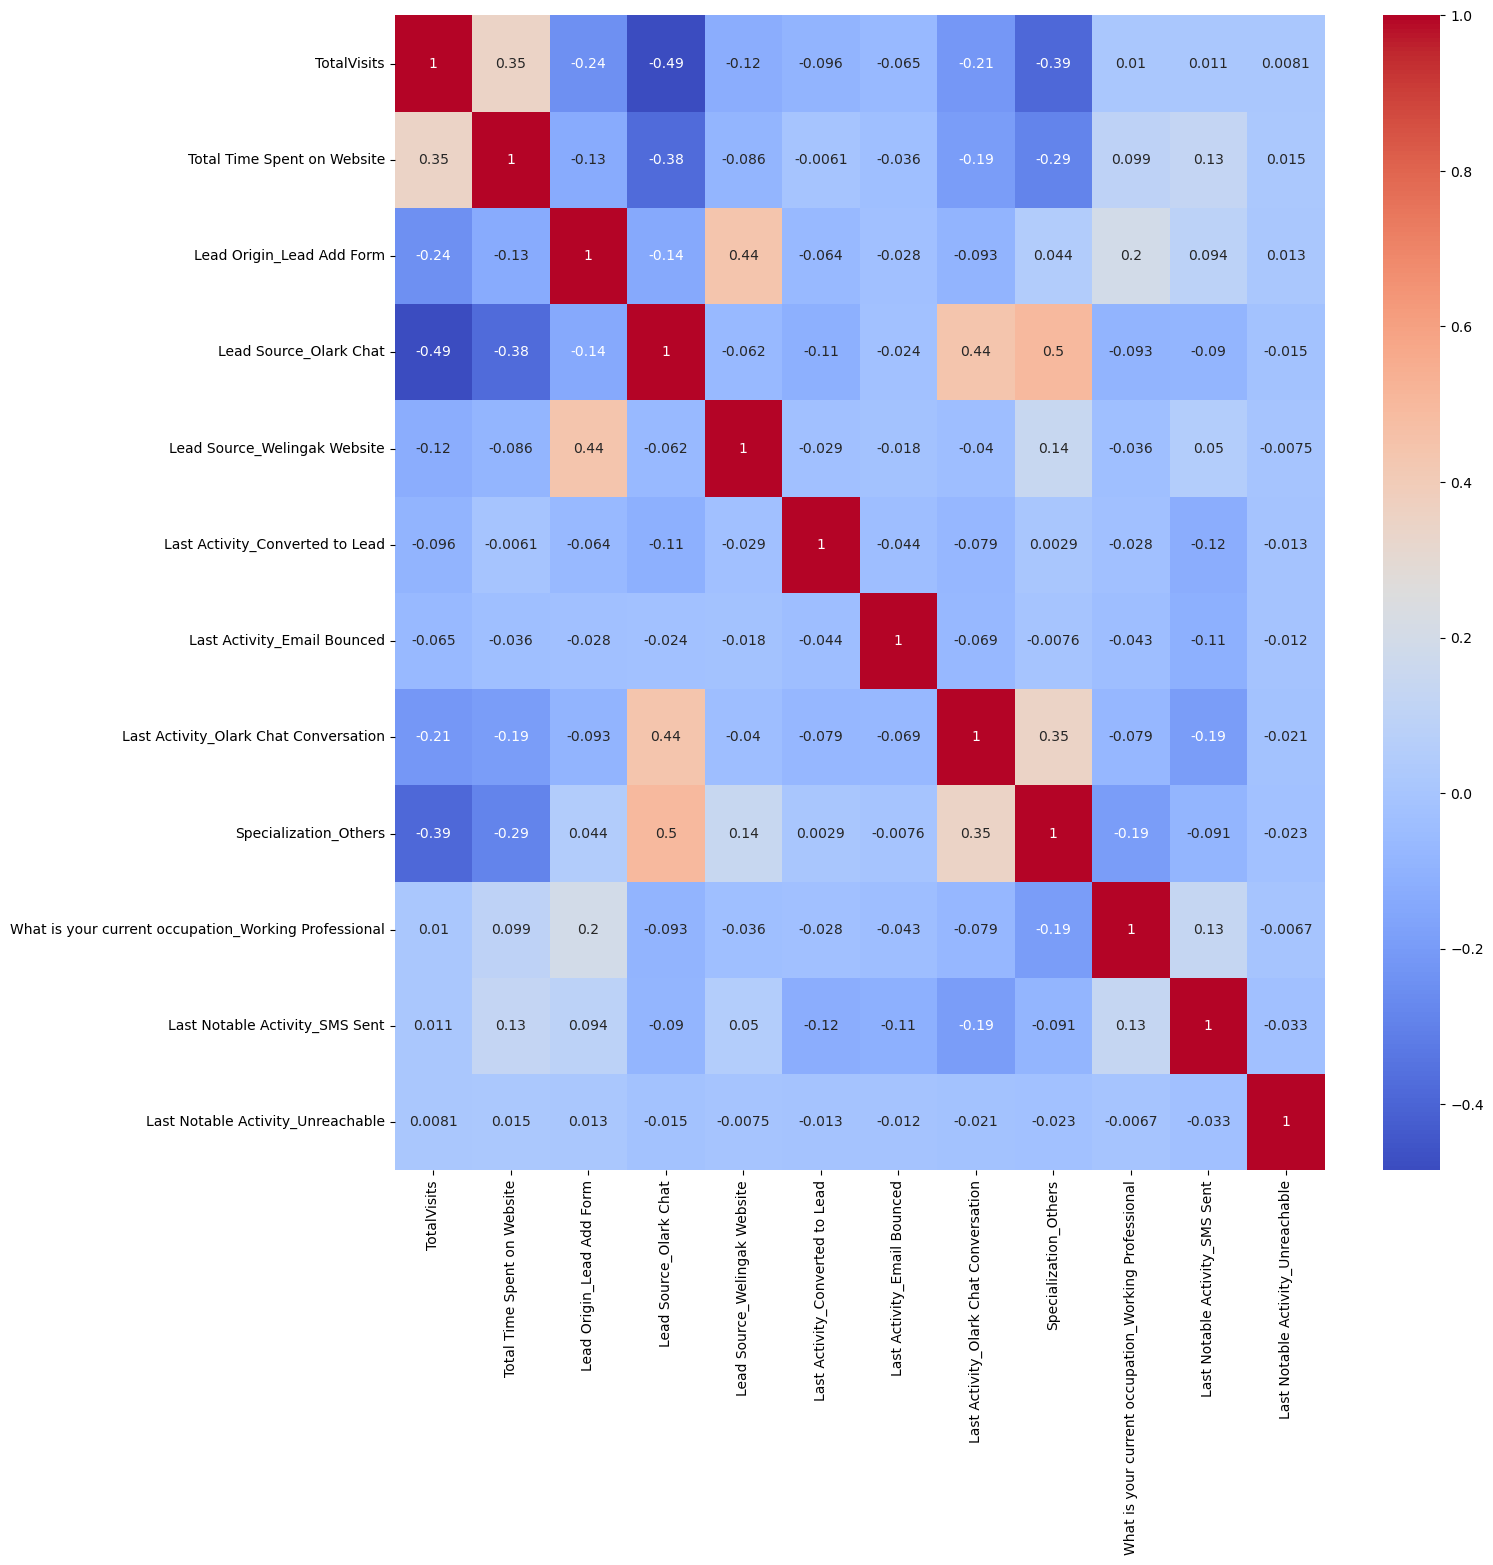

In [73]:
plot_heatmap(cols)

In [74]:
#final columns after model building
final_cols=cols

## Step 9: Model Prediction

In [75]:
#Find predicted values for train data
X_train_sm=sm.add_constant(X_train[cols])
lgm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lgm.fit()
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.09803244, 0.07449002, 0.12884658, 0.21996237, 0.38240864,
       0.06473778, 0.06473778, 0.11683131, 0.22603977, 0.34133939])

In [76]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final= pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id']=y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id
0          0        0.098032         5493
1          0        0.074490         8064
2          0        0.128847         4716
3          0        0.219962         9117
4          1        0.382409         2402

We have considered our cut-off value as 0.5.WIth this consideration, values above 0.5 probability is considered as `Converted` and below the threshaold as `Not Converted`.
However, through ROC curve in later stage we can find the actual cutt-off for the model.

In [77]:
#Creating new column 'predicted' which indicates 1, if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted
0          0        0.098032         5493          0
1          0        0.074490         8064          0
2          0        0.128847         4716          0
3          0        0.219962         9117          0
4          1        0.382409         2402          0

## Step 10: Model Evaluation

In [78]:
#Create confusion metrics
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted )
print(confusion)

[[3455  454]
 [ 728 1683]]


In [79]:
#Checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8129746835443038


In [80]:
#Create vraiables from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
#Calculate Sensitivity 
Sensitivity=TP/float(TP+FN)
Sensitivity

0.6980506014102033

In [82]:
#Calculate Specificity
Specificity=TN/float(TN+FP)
Specificity

0.8838577641340496

In [83]:
#Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.11614223586595038


In [84]:
#Positive predictive value 
print(TP/float(TP+FP))

0.7875526438933084


In [85]:
#Negative predictive value
print(TN/float(TN+ FN))

0.8259622280659814


From the logestic regression model we build be have the following stats:
1.  **Accuracy:** ~80%
2.  **Sensitivity:** ~65%
3.  **Specificity:** ~89%
4.  **False postive rate:** ~10%
5.  **Positive predictive value:** ~79%
6.  **Negative predictive value** ~81%

## Step 11: Plotting ROC Curve

In [86]:
#Define function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [87]:
#GEt values from ROC function
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob,drop_intermediate=False)

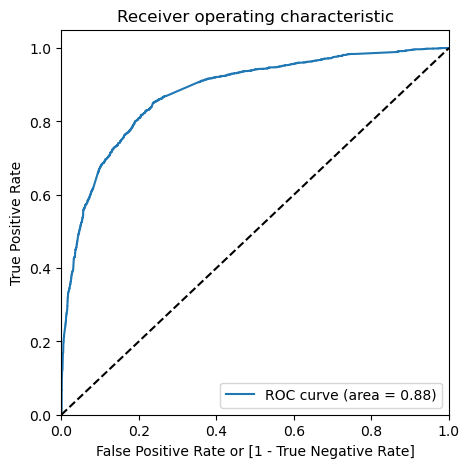

In [88]:
#Plot ROC Cureve
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

The plot has ROC curve near to y axis which is nearly equal to 1. With this plot, we can consider the model build is a good model.

## Step 12: Finding Optimal Cutoff Point

In [89]:
#Create columns with probability cutoffs ranging from 0.1 to 0.9
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.098032         5493          0    1    0    0    0    0   
1          0        0.074490         8064          0    1    0    0    0    0   
2          0        0.128847         4716          0    1    1    0    0    0   
3          0        0.219962         9117          0    1    1    1    0    0   
4          1        0.382409         2402          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [90]:
#Calculate accuracy,sensitivity and specificity for various probability cutoffs.
cutoff_p=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
num=[float(x)/10 for x in range(10)]
for i in num:
    cm=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total  
    speci=cm[0,0]/(cm[0,0]+cm[0,1])
    sensi=cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_p.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_p)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.587975  0.963086  0.356613
0.2   0.2  0.736392  0.914144  0.626759
0.3   0.3  0.795886  0.834923  0.771809
0.4   0.4  0.805854  0.770220  0.827833
0.5   0.5  0.812975  0.698051  0.883858
0.6   0.6  0.799684  0.589797  0.929138
0.7   0.7  0.782278  0.507258  0.951906
0.8   0.8  0.749525  0.388221  0.972371
0.9   0.9  0.713924  0.270012  0.987721


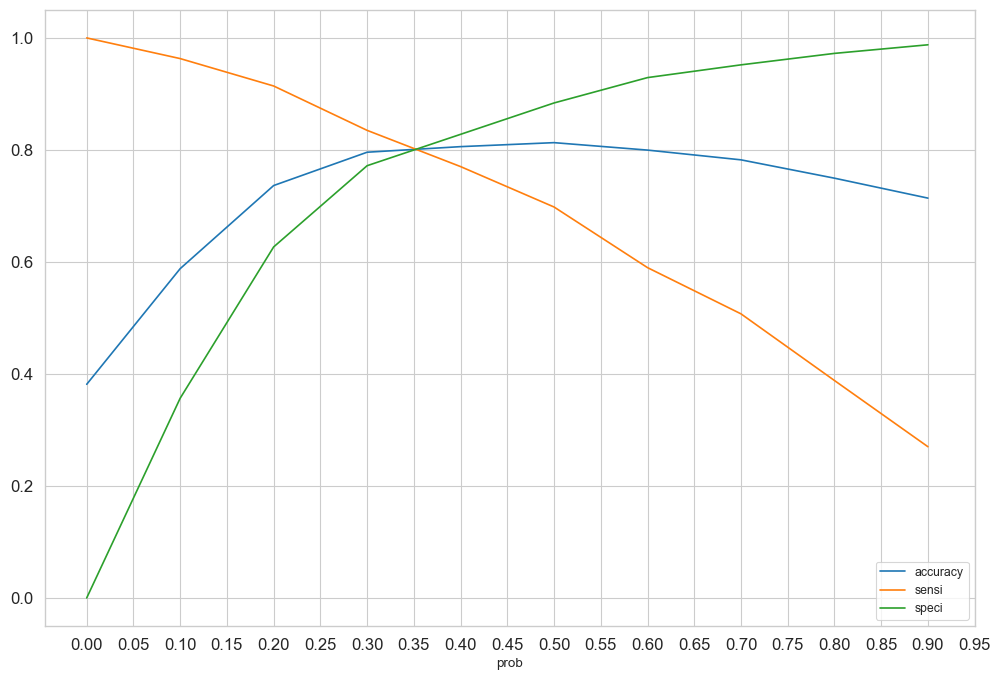

In [91]:
#Plot accuracy,sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_p.plot.line(x='prob',y=['accuracy','sensi','speci'],figsize=(12,8))
plt.xticks(np.arange(0, 1,step=0.05),size = 12)
plt.yticks(size = 12)
plt.show()

From the above plot we see 0.35 as the cut-off value.

In [92]:
#Predict values for probability with cut-off 0.34
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.35 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.098032         5493          0    1    0    0    0    0   
1          0        0.074490         8064          0    1    0    0    0    0   
2          0        0.128847         4716          0    1    1    0    0    0   
3          0        0.219962         9117          0    1    1    1    0    0   
4          1        0.382409         2402          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    0    0    0    0    0                1

In [93]:
#Calculate the lead score
y_train_pred_final['lead_score_board']=y_train_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score_board']].head()

Converted  Converted_Prob  Prospect Id  final_Predicted  lead_score_board
0          0        0.098032         5493                0                10
1          0        0.074490         8064                0                 7
2          0        0.128847         4716                0                13
3          0        0.219962         9117                0                22
4          1        0.382409         2402                1                38

Let's check all the stats again after using optimal cut-off value.

In [94]:
#Create confusion metrics
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_Predicted )
print(confusion)

[[3130  779]
 [ 462 1949]]


In [95]:
#Checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8036392405063291


In [96]:
#Create vraiables from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
#Calculate Sensitivity 
Sensitivity=TP/float(TP+FN)
Sensitivity

0.808378266279552

In [98]:
#Calculate Specificity
Specificity=TN/float(TN+FP)
Specificity

0.8007162957278077

In [99]:
#Calculate false postive rate - predicting non conversion when leads have converted
print(FP/float(TN+FP))

0.19928370427219239


In [100]:
#Positive predictive value 
print(TP/float(TP+FP))

0.7144428152492669


In [101]:
#Negative predictive value
print(TN/float(TN+ FN))

0.871380846325167


In [102]:
#Calculate Precision
precision=TP/(TP+FP)
precision

0.7144428152492669

In [103]:
#Calculate Recall
recall=TP/(TP+FN)
recall

0.808378266279552

In [104]:
#View Classification report
print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3909
           1       0.71      0.81      0.76      2411

    accuracy                           0.80      6320
   macro avg       0.79      0.80      0.80      6320
weighted avg       0.81      0.80      0.81      6320



From the logestic regression model we build be have the following stats:
1.  **Accuracy:** ~80%
2.  **Sensitivity:** ~81%
3.  **Specificity:** ~80%
4.  **False postive rate:** ~20%
5.  **Positive predictive value:** ~71%
6.  **Negative predictive value** ~87%
7.  **Precision:** ~71%
8.  **Recall:** ~81%

In [105]:
#Find the F1 score
F1=2*(precision*recall)/(precision+recall)
print(F1)

0.7585133294415256


In [106]:
#Find the values from precision recal curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

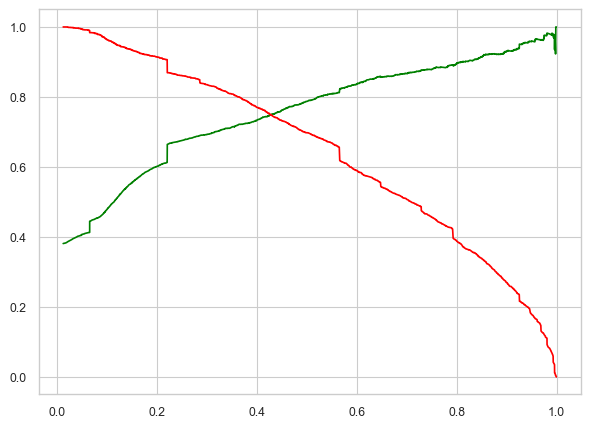

In [107]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Shows almost same values as we see in ROC curve

In [108]:
#Final columns used in test dataset
print(final_cols)

['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Specialization_Others', 'What is your current occupation_Working Professional', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable']


Perform scaling on test dataset

In [109]:
#Scaling test dataset
X_test[initial_cols]=scaler.transform(X_test[initial_cols])

In [110]:
#Final columns in test dataset
X_test=X_test[final_cols]

In [111]:
#View test dataset
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4664       0.0000                     0.000000                        0.0   
5394       0.2500                     0.072183                        0.0   
1595       0.2500                     0.515405                        0.0   
2111       0.4375                     0.229754                        0.0   
9182       0.0000                     0.000000                        0.0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4664                     1.0                           0.0   
5394                     1.0                           0.0   
1595                     0.0                           0.0   
2111                     0.0                           0.0   
9182                     1.0                           0.0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4664                              0.0                          0.0   
5394                              0.0                          0.0   
1595                              0.0                          0.0   
2111                              0.0                          0.0   
9182                              0.0                          0.0   

      Last Activity_Olark Chat Conversation  Specialization_Others  \
4664                                    0.0                    1.0   
5394                                    0.0                    0.0   
1595                                    0.0                    0.0   
2111                                    0.0                    0.0   
9182                                    0.0                    1.0   

      What is your current occupation_Working Professional  \
4664                                                   0.0   
5394                                                   0.0   
1595                                                   1.0   
2111                                                   0.0   
9182                                                   0.0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
4664                             0.0                                0.0  
5394                             0.0                                0.0  
1595                             0.0                                0.0  
2111                             0.0                                0.0  
9182                             0.0                                0.0

In [112]:
#Adding constant to test dataset
X_test_sm=sm.add_constant(X_test)

In [113]:
#Create prediction varaiable from test dataset
y_test_pred=res.predict(X_test_sm)

In [114]:
#View some predictions
y_test_pred.head(10)

4664    0.219962
5394    0.403642
1595    0.932217
2111    0.246658
9182    0.219962
1055    0.476366
541     0.122343
446     0.980668
3728    0.037654
4249    0.107768
dtype: float64

In [115]:
##Create dataframe to save prediction
y_test_pred_final=pd.DataFrame(y_test)

In [116]:
#Ad columns which save prediction
y_test_pred_final['Converted_Prob']=y_test_pred

In [117]:
#Create prospect id column
y_test_pred_final['Prospect Id'] = y_test_pred_final.index

In [118]:
#Create lead score column
y_test_pred_final["Lead_score"]=round(y_test_pred*100)

In [119]:
#View prediction dataframe
y_test_pred_final.head()

Converted  Converted_Prob  Prospect Id  Lead_score
4664          0        0.219962         4664        22.0
5394          0        0.403642         5394        40.0
1595          1        0.932217         1595        93.0
2111          0        0.246658         2111        25.0
9182          0        0.219962         9182        22.0

In [120]:
#Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_score'], axis=1)

In [121]:
#View dataset after rearranging
y_test_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_score
4664         4664          0        0.219962        22.0
5394         5394          0        0.403642        40.0
1595         1595          1        0.932217        93.0
2111         2111          0        0.246658        25.0
9182         9182          0        0.219962        22.0

In [122]:
#PErform predictioon of finalised cut-off
y_test_pred_final['Final_Predicted']=y_test_pred_final.Converted_Prob.map(lambda x:1 if x>0.35 else 0)
y_test_pred_final.head()

Prospect Id  Converted  Converted_Prob  Lead_score  Final_Predicted
4664         4664          0        0.219962        22.0                0
5394         5394          0        0.403642        40.0                1
1595         1595          1        0.932217        93.0                1
2111         2111          0        0.246658        25.0                0
9182         9182          0        0.219962        22.0                0

Let's check all the stats in test dataset after using optimal cut-off value.

In [123]:
#Create confusion metrics
confusion=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Final_Predicted )
print(confusion)

[[1306  337]
 [ 196  870]]


In [124]:
#Checking the overall accuracy
print(accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted))

0.8032484311554079


In [125]:
#Create vraiables from confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
#Calculate Sensitivity 
Sensitivity=TP/float(TP+FN)
Sensitivity

0.8161350844277674

In [127]:
#Calculate Specificity
Specificity=TN/float(TN+FP)
Specificity

0.7948874010955569

In [128]:
#Calculate false postive rate - predicting non conversion when leads have converted
print(FP/float(TN+FP))

0.20511259890444308


In [129]:
#Positive predictive value 
print(TP/float(TP+FP))

0.7207953603976802


In [130]:
#Negative predictive value
print(TN/float(TN+ FN))

0.8695073235685752


In [131]:
#Calculate Precision
precision=TP/(TP+FP)
precision

0.7207953603976802

In [132]:
#Calculate Recall
recall=TP/(TP+FN)
recall

0.8161350844277674

From the logestic regression model we build be have the following stats:
1.  **Accuracy:** ~80%
2.  **Sensitivity:** ~82%
3.  **Specificity:** ~79%
4.  **False postive rate:** ~20%
5.  **Positive predictive value:** ~72%
6.  **Negative predictive value** ~87%
7.  **Precision:** ~72%
8.  **Recall:** ~82%

The values which we see in test data is almost same as we saw in train dataset.

Let's calculate the Cross Validation Score to see how our model performs and confirm there is no overfitting.

In [133]:
#Check score and accuracy from cros valisation score
X=X_train[:200]
y=y_train[:200]
lr=LogisticRegression(solver='lbfgs')
scores=cross_val_score(lr,X,y,cv=10)
scores.sort()
accuracy=scores.mean()
print(scores)
print(accuracy)

[0.65 0.75 0.75 0.75 0.8  0.8  0.85 0.85 0.9  0.9 ]
0.8


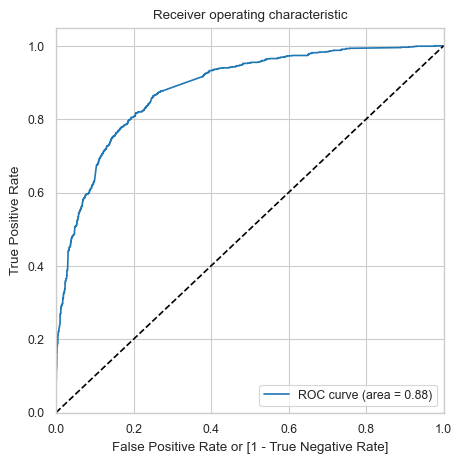

In [134]:
#Check ROC curve plot
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"])

### Calculate Lead Score

In [135]:
#Take dataframe of the prediction data of test 
Leads_test_pred = y_test_pred_final.copy()
Leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  Lead_score  Final_Predicted
4664         4664          0        0.219962        22.0                0
5394         5394          0        0.403642        40.0                1
1595         1595          1        0.932217        93.0                1
2111         2111          0        0.246658        25.0                0
9182         9182          0        0.219962        22.0                0

In [136]:
#Take dataframe of the prediction data of train 
Leads_train_pred = y_train_pred_final.copy()
Leads_train_pred.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.098032         5493          0    1    0    0    0    0   
1          0        0.074490         8064          0    1    0    0    0    0   
2          0        0.128847         4716          0    1    1    0    0    0   
3          0        0.219962         9117          0    1    1    1    0    0   
4          1        0.382409         2402          0    1    1    1    1    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  lead_score_board  
0    0    0    0    0    0                0                10  
1    0    0    0    0    0                0                 7  
2    0    0    0    0    0                0                13  
3    0    0    0    0    0                0                22  
4    0    0    0    0    0                1                38

In [137]:
#Drop the columns which are not required from train set
Leads_train_pred=Leads_train_pred[['Prospect Id','Converted','Converted_Prob','lead_score_board','final_Predicted']]
Leads_train_pred.head()

Prospect Id  Converted  Converted_Prob  lead_score_board  final_Predicted
0         5493          0        0.098032                10                0
1         8064          0        0.074490                 7                0
2         4716          0        0.128847                13                0
3         9117          0        0.219962                22                0
4         2402          1        0.382409                38                1

In [138]:
#Rename columns as seen in test set
Leads_train_pred.columns=['Prospect Id', 'Converted', 'Converted_Prob', 'Lead_score',
       'Final_Predicted']

#### Using Feature importance

In [139]:
#View the coefficents from our final model
params = res.params
params

const                                                  -2.511701
TotalVisits                                             0.804557
Total Time Spent on Website                             4.540470
Lead Origin_Lead Add Form                               3.846521
Lead Source_Olark Chat                                  1.592502
Lead Source_Welingak Website                            2.432647
Last Activity_Converted to Lead                        -0.905758
Last Activity_Email Bounced                            -1.714382
Last Activity_Olark Chat Conversation                  -1.404596
Specialization_Others                                  -0.346688
What is your current occupation_Working Professional    2.591633
Last Notable Activity_SMS Sent                          1.525977
Last Notable Activity_Unreachable                       1.627492
dtype: float64

In [140]:
#Exclude the constant from the parameters
params = res.params[1:]
params

TotalVisits                                             0.804557
Total Time Spent on Website                             4.540470
Lead Origin_Lead Add Form                               3.846521
Lead Source_Olark Chat                                  1.592502
Lead Source_Welingak Website                            2.432647
Last Activity_Converted to Lead                        -0.905758
Last Activity_Email Bounced                            -1.714382
Last Activity_Olark Chat Conversation                  -1.404596
Specialization_Others                                  -0.346688
What is your current occupation_Working Professional    2.591633
Last Notable Activity_SMS Sent                          1.525977
Last Notable Activity_Unreachable                       1.627492
dtype: float64

In [141]:
#Obtaining a relative coefficient value for all features in relation to the feature with the greatest coefficient.
feature_importance=params
feature_importance=100.0*(feature_importance/feature_importance.max())
feature_importance.sort_values(ascending=False)

Total Time Spent on Website                             100.000000
Lead Origin_Lead Add Form                                84.716362
What is your current occupation_Working Professional     57.078527
Lead Source_Welingak Website                             53.576998
Last Notable Activity_Unreachable                        35.844141
Lead Source_Olark Chat                                   35.073516
Last Notable Activity_SMS Sent                           33.608349
TotalVisits                                              17.719688
Specialization_Others                                    -7.635499
Last Activity_Converted to Lead                         -19.948547
Last Activity_Olark Chat Conversation                   -30.935042
Last Activity_Email Bounced                             -37.757813
dtype: float64

#### Ranking features based on feature importance

In [142]:
#Sorting features based on their importance
sorted_features=np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_features

TotalVisits                                              6
Total Time Spent on Website                              7
Lead Origin_Lead Add Form                                5
Lead Source_Olark Chat                                   8
Lead Source_Welingak Website                             0
Last Activity_Converted to Lead                         10
Last Activity_Email Bounced                              3
Last Activity_Olark Chat Conversation                   11
Specialization_Others                                    4
What is your current occupation_Working Professional     9
Last Notable Activity_SMS Sent                           2
Last Notable Activity_Unreachable                        1
dtype: int64

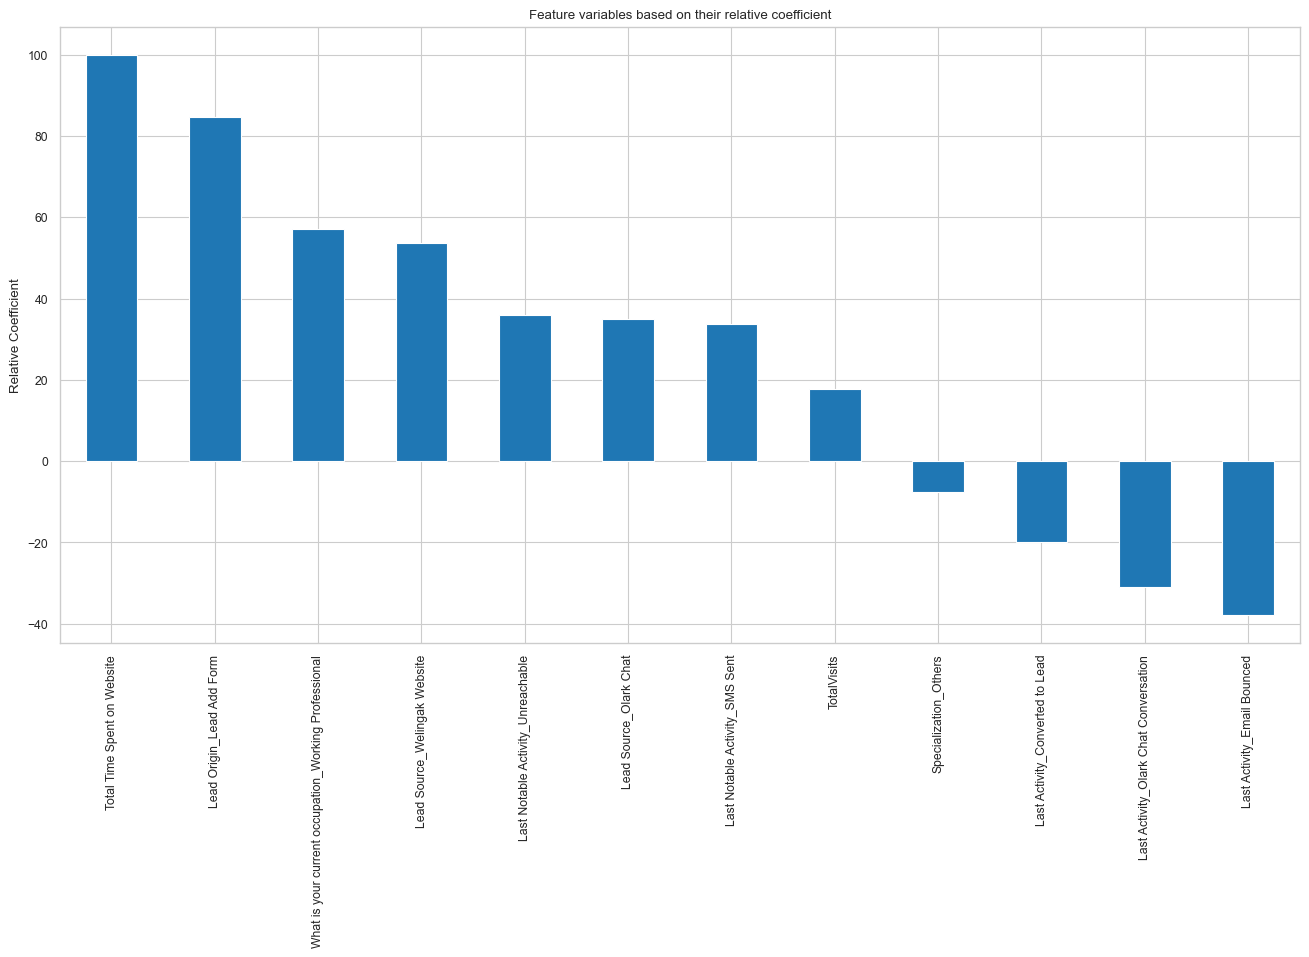

In [143]:
#Plot depicting the feature variables according to their respective coefficient values.
plt.figure(figsize = (16,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [144]:
#Selecting the top five factors that contribute most to the chance of a lead being converted
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(5)

index           0
1                            Total Time Spent on Website  100.000000
2                              Lead Origin_Lead Add Form   84.716362
9   What is your current occupation_Working Professional   57.078527
4                           Lead Source_Welingak Website   53.576998
11                     Last Notable Activity_Unreachable   35.844141

In [145]:
#Selecting the top five factors that contribute least to the chance of a lead being converted
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=True).head(5)

index          0
6            Last Activity_Email Bounced -37.757813
7  Last Activity_Olark Chat Conversation -30.935042
5        Last Activity_Converted to Lead -19.948547
8                  Specialization_Others  -7.635499
0                            TotalVisits  17.719688

## <center> RESULTS

**Final Observation:**

**So, as we can see above, the model appears to be working well. The ROC curve has a value of 1, which is extremely good.
Let us compare the values acquired for Train and Test Sets:**

**Train Data:**
**Accuracy :** 80.36%
**Sensitivity :** 80.83%
**Specificity :** 80.07%

**Test Data:**
**Accuracy :** 80.32%
**Sensitivity :** 81.61%
**Specificity :** 79.48%

## <center> CONCLUSIONs & RECOMMENDATIONS

### After trying numerous models, we eventually picked model number four with the following characteristics:

- There were many variables having p-value<0.05,highlighting crucial elements that contribute to lead conversion.
- All the features had very low VIF values which was below 5,which indicates that there is no muliticollinearity among the features. This can be seen from VIF table and the heat map.
- The ROC curve is close to value of 1, which is very good.
- On the test dataset, the total accuracy was almost 80% at a probability threshold of 0.34, which is extremely satisfactory.


- **For Train Dataset**
  - Accuracy           : 80.36%
  - Sensitivity/Recall : 80.83%
  - Specificity        : 80.07%
  - False positive rate:  19.92%
  - Precision/Positive predictive value:  71.44%
  - Negative predictive value:  87.13%
  - ROC : 0.88
  - F1 Score : 0.76
  
  <br>

- **For Test Dataset**
  - Accuracy           :  80.32%
  - Sensitivity/Recall :  81.61%
  - Specificity        :  79.48%
  - False postive rate :  20.51%
  - Precision/Positive predictive value:  72.07%
  - Negative predictive value:  86.95%
  - ROC : 0.88


- **The final optimal threshold for the model is 0.35** which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.

- High sensitivity guarantees that the majority of leads who are likely to convert are accurately forecasted, whilst high specificity ensures that the majority of leads who are unlikely to convert are properly anticipated.

# END